# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
# city_data_to_load = "../Resources/city_data.csv"
# ride_data_to_load = "../Resources/ride_data.csv"

city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"


# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load, parse_dates=["date"])

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.910000e+12,46,Urban


In [4]:
# pyber_data_df.groupby([<categorical column>])[<numerical column>].count()

# pyber_data_df['category type'].value_counts()

# TUTOR _ EXAMPLE :- Get me the mean fare for each city type
pyber_data_df.groupby(['type'])['fare'].mean()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"])["ride_id"].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
# total_drivers = pyber_data_df.groupby(["type"])["driver_count"].sum()

total_drivers = city_data_df.groupby(["type"])["driver_count"].sum()
total_drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"])["fare"].sum()
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
avg_ride_fare = pyber_data_df.groupby(['type'])['fare'].mean()

In [9]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare = (total_fares / total_drivers)
avg_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
                        data={
                            "Total Rides":total_rides, 
                            "Total Drivers":total_drivers,
                             "Total Fares":total_fares, 
                             "Average Fare per Ride":avg_ride_fare,
                            "Average Fare per Driver":avg_driver_fare
                            },
                        )

In [11]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [13]:
#  8. Format the columns.
# pd.options.display.float_format = '${:.2f}'.format
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.0f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,328",$34.62,$55.49
Suburban,625,490,"$19,356",$30.97,$39.50
Urban,"1,625","2,405","$39,854",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame
pyber_data_df_copy = pyber_data_df.copy()

In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df_copy.groupby(by=["type", "date"])["fare"].sum()

In [16]:
df

type   date               
Rural  2019-01-01 09:45:00    43.69
       2019-01-02 11:18:00    52.12
       2019-01-03 19:51:00    19.90
       2019-01-04 03:31:00    24.88
       2019-01-06 07:38:00    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:00    18.45
       2019-05-08 07:29:00    18.55
       2019-05-08 11:38:00    19.77
       2019-05-08 13:10:00    18.04
Name: fare, Length: 2364, dtype: float64

In [17]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
df = df.reset_index()

In [18]:
df

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2019-05-08 04:20:00,21.99
2360,Urban,2019-05-08 04:39:00,18.45
2361,Urban,2019-05-08 07:29:00,18.55
2362,Urban,2019-05-08 11:38:00,19.77


In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df_pivot=pd.pivot(df, index="date", columns="type", values="fare")

In [20]:
df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [21]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

df_pivot_subset = df_pivot.loc['2019-01-01':'2019-04-29']
# df["date"] = df["date"].apply(pd.Timestamp)
# df["date"] = df["date"].dt.floor('D')
# df[df["date"] == '2019-01-01']

In [22]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
df_pivot_subset.index = pd.to_datetime(df_pivot_subset.index)

In [23]:
# 7. Check that the datatype for the index is datetime using df.info()
df_pivot_subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [24]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df_pivot_subset_resampled = df_pivot_subset.resample('W').sum()

In [25]:
df_pivot_subset_resampled.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [26]:
# df_pivot_subset.loc["2019-04-29":"2019-05-11"].sum()

<AxesSubplot:xlabel='date'>

<Figure size 2160x360 with 0 Axes>

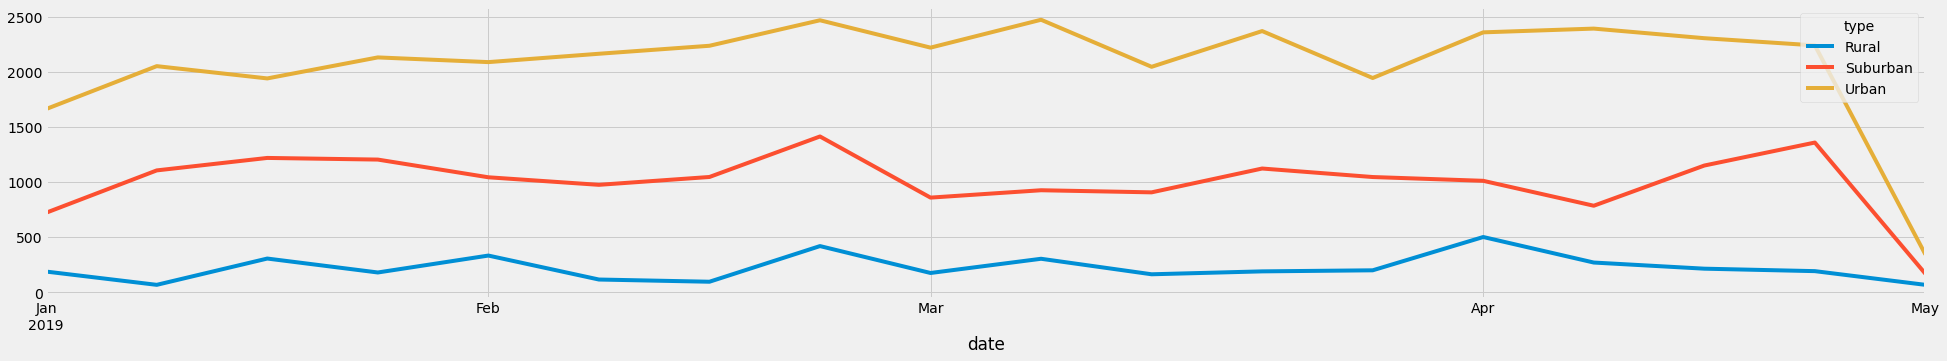

In [28]:
from IPython.core.pylabtools import figsize
figsize(30, 5)
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.figure(figsize=(30,5))
df_pivot_subset_resampled.plot()